# Session 2: 15/11/22

# 1. Increase in tree populations in Norfolk # 

In the paper ‘Postglacial population of forest trees in Norfolk, UK’ by K.D. Bennet (Nature, 1983), the pollen sediments in an infilled lake were dated and quantified. This was used to obtain a measure of the accumulation rate of pollen grains at different points of time. By assuming that the pollen grain production rates reflect the population of trees at the moment the pollen is produced, this dataset allows us to quantify the population of trees a long time ago (~9000 years ago), which increases rapidly with the rising temperatures of that time. <br> These datasets will allow us to quantitatively test the models introduced in the previous session and learn about the biology underlying these measurements.

## 1.1 Pinus sylvestris

We will first analyse the data for pine trees (*P. sylvestris*). The dataset gives us an estimate of the amount of trees of a particular species (pines, in this case) present at different timepoints. To import the data and plot it, execute the cell below by clicking on it and pressing Shift+Enter.

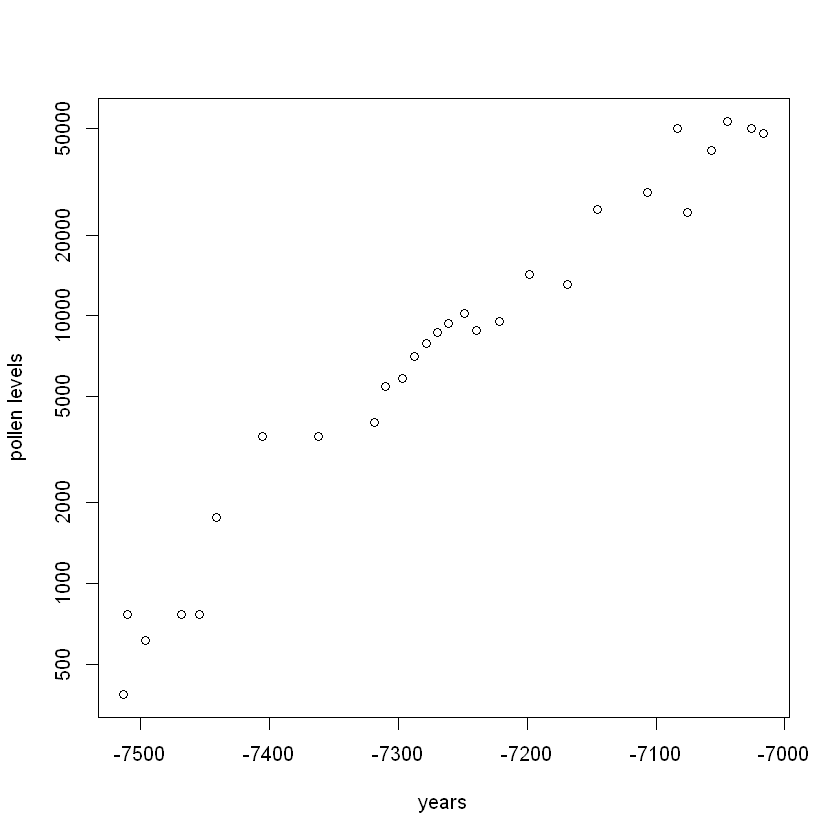

In [29]:
data_Psylvestris <-read.csv("Bennet_1983_Psylvestris.csv") #Imports the data from the paper from the csv file.
years<-1983-data_Psylvestris[[1]] #The data is in "years ago" - this line changes it to years BC.
plot(years, data_Psylvestris[[2]], log="y", xlab="years", ylab="pollen levels") #Plots the data in logarithmic scale.

**Assumption:** To create a mathematical model we first need the assumptions we will build into the model. In this case, the main one is that the reproduction rate of trees is proportional to the number of trees present at each point in time (Malthusian growth). For example, the more trees present the more seeds they will produce, leading to an increase in tree population.

**Equations:** Translating the assumption into equations,
\begin{equation}
\frac{d N}{d t}= a N,
\end{equation}
where $N$ is the pine tree population at each point of time and $a$ is the reproduction rate. Then $dN/dt$ represents the rate of change of the population ($N$) with respect to time ($t$).


**Solving the equations:** 
We will first need to install the 'deSolve' package to solve Ordinary Differential Equations (ODEs) with R (below).

In [30]:
install.packages("deSolve") #If the package needs to be installed. If it's already installed you will get a warning - ignore it.
library("deSolve") #This is the library we will use to solve the equations

Warning message:
"package 'deSolve' is in use and will not be installed"


Then, we can write down the equations in R code. This is essentially done by writing the function "growth_func" (a\*N is the actual function where a is a parameter and y is the number of trees at any moment of time) and we will use the in-built function "ode" from the 'deSolve' package to solve the equation with initial contition N0 and between the times specified in the "times" vector.

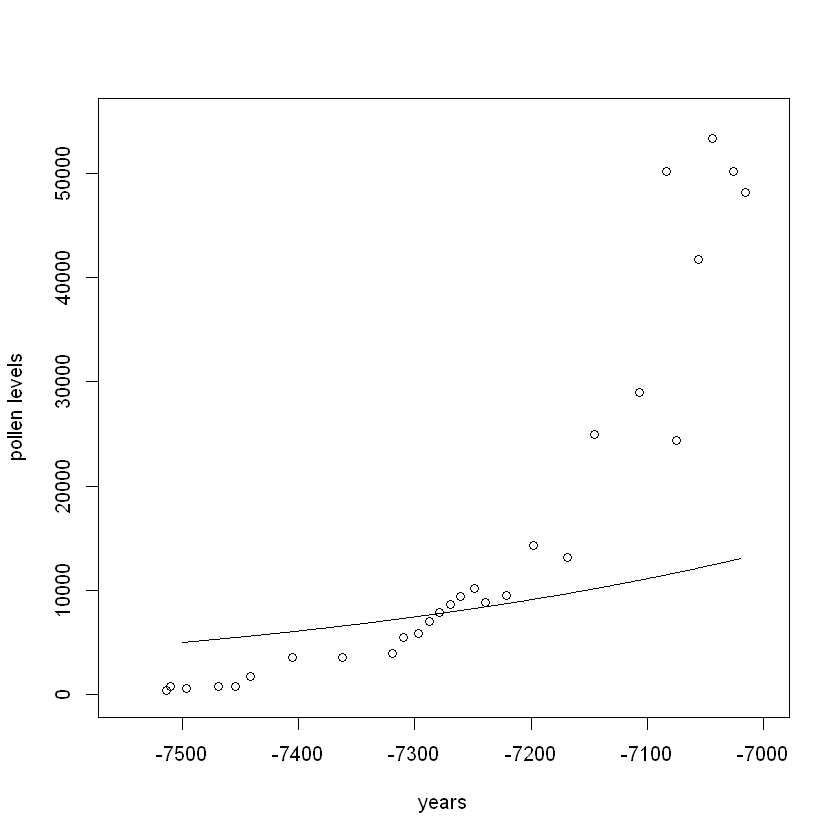

In [31]:
times=seq(-7500,-7020,1) #Creates a vector of timepoints (years) at which the solution will be evaluated
N0=5000 #Initial condition
growth_func<-function(t,N,a){list(a*N)} #Malthusian growth function.
sol=ode(N0,times,growth_func,0.002) #Calls the R function ‘ode’ to solve the ODE model with parameter a=0.002
plot(sol[,1],sol[,2], type="l", xlim=c(-7550,-7000), ylim=c(0,55000), xlab="years", ylab="pollen levels") #Plots the solution with a line
points(years, data_Psylvestris[[2]]) # Adds the dataset to the plot

**Change the values of the parameters to adjust the solution of the model to the dataset.** Note you have two parameters: the initial condition N0 and the growth rate a. Once you have a set of parameter values that represent the data well, you can obtain some information about pine trees. **Question:** *Which parameter offers you the most information? What is this information?* (Hint: What is $1/a$?)

Answer:

## 1.2 Corylus avellana

Now we try the same thing with the common hazel (*C. avellana*). Again, to import the data and plot it, execute the cell below.

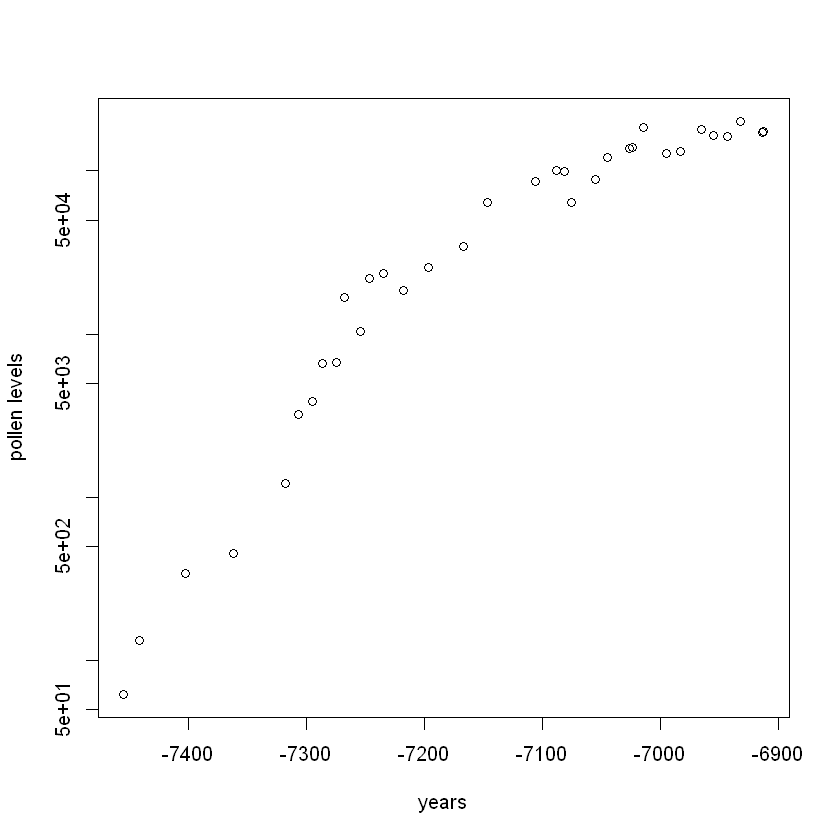

In [32]:
data_Cavellana <-read.csv("Bennet_1983_Cavellana.csv") #Imports the data from the paper from the csv file.
yearsCa<-1983-data_Cavellana[[1]] #The data is in "years ago" - this line changes it to years BC.
plot(yearsCa, data_Cavellana[[2]], log="y", xlab="years", ylab="pollen levels") #Plots the data in logarithmic scale.#

Try modelling this dataset using the same assumption and models as for pine trees. You can try using the code below:

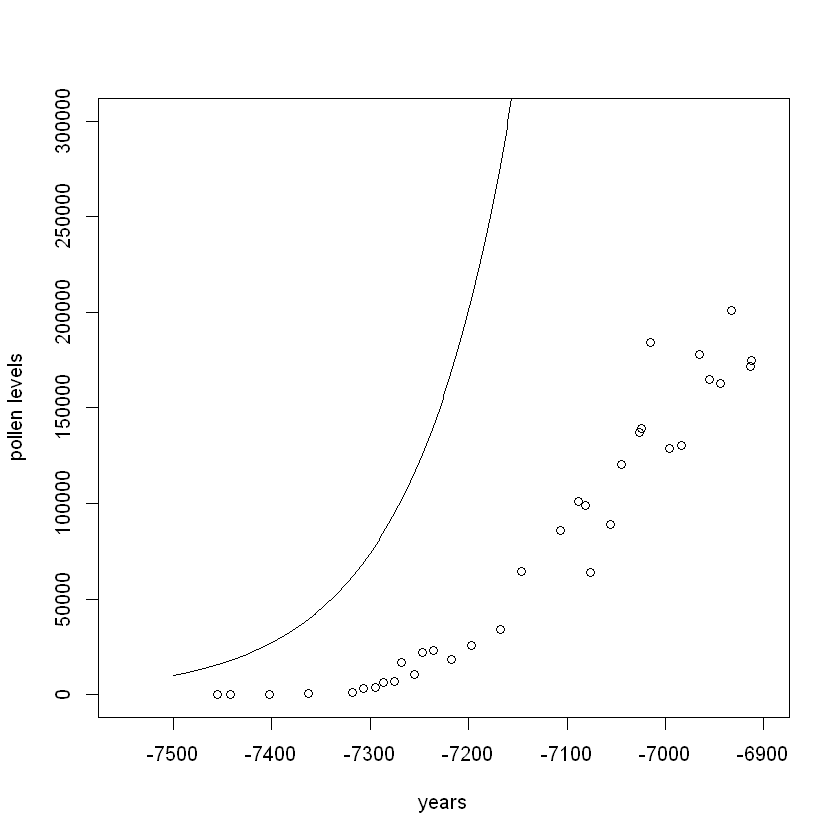

In [33]:
times=seq(-7500,-6900,1) #Creates a vector of timepoints (years) at which the solution will be evaluated
N0=10000 #Initial condition
growth_func<-function(t,N,a){list(a*N)} #Malthusian growth function.
sol=ode(N0,times,growth_func,0.01) #Calls the R function ‘ode’ to solve the ODE model with parameter a=0.02
plot(sol[,1],sol[,2], type="l", xlim=c(-7550,-6900), ylim=c(0,300000), xlab="years", ylab="pollen levels") #Plots the solution with a line
points(yearsCa, data_Cavellana[[2]]) # Adds the dataset to the plot

**Change the parameters and try to get a good agreement between the data and the model. Question:** *Could this dataset be approximately modelled with a Malthusian growth model? Why?*	

Answer:

**Revisiting the assumptions:** Given that we were not successful modelling this dataset, we need revise our assumptions. In the context of population biology, it is often the case that one needs to consider the amount of resources available for the population to grow. <br>

**Equations**
Then, in this case, we can try modelling it with a logistic growth that takes into account the limitations in resources:
\begin{equation}
\frac{dN}{dt}=a N(R-N),
\end{equation}
where $a$ can still be related to a growth rate (or seed production rate in this case) and the parameter $R$ corresponds to the limited resources available to the population to grow and survive. <br>

**Solving the equations:**
We can reuse the code we have for pine trees but we need to adjust the growth function from a\*y to a[1]\*y\*(a[2]-y), where a[1] and a[2] are the two parameters. This has already been implemented in the cell below.

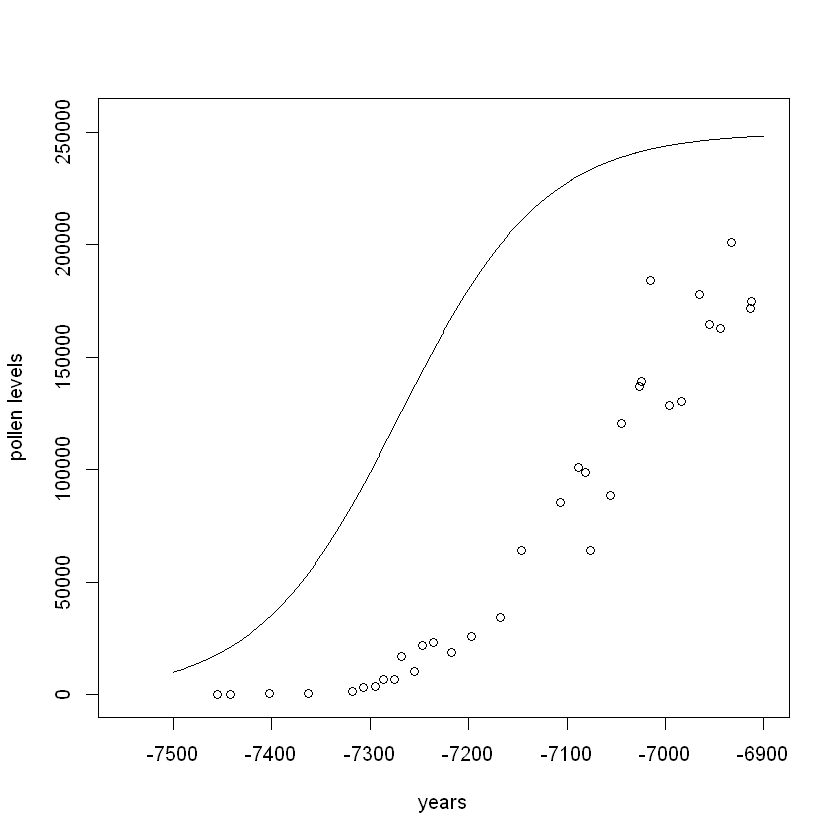

In [34]:
timesCa=seq(-7500,-6900,1) #Creates a vector of timepoints (years) at which the solution will be evaluated
y0=10000 #Initial condition
growth_func<-function(t,y,a){list(a[1]*y*(a[2]-y))} #Logistic growth function.
# Make a vector (list) containing the model parameters, a & R
a <- (c(
        5.5*10^-8,     # this is parameter a
        250000      # this is parameter R
      ))
sol=ode(y0,timesCa,growth_func,a) #Calls the R function ‘ode’ to solve the ODE model with parameter given in the vector a
plot(sol[,1],sol[,2], type="l", xlim=c(-7550,-6900), ylim=c(0,255000), xlab="years", ylab="pollen levels") #Plots the solution with a line
points(yearsCa, data_Cavellana[[2]]) # Adds the dataset to the plot

**Change the values of the parameters to adjust the solution of the model to the dataset.** **Question:** *Once you have successfully captured the data with the model, can you estimate which is the maximum density of hazels this area can sustain?*

Answer:

**Question:** *Given this mathematical modelling, what can we infer from the behaviour of these tree species? Which one seems to reproduce faster? Towards the end of this dataset (~7000 years BC), is any of them depleting significantly the available resources?*

Answer:

# 2. Michaelis-Menten kinetics in histone modifications

In the previous session we explored how to model mathematically biochemical reactions, or at least how to write down the equations. We finished by obtaining the equations for the Michaelis-Menten reactions:
\begin{equation}
S+E \leftrightharpoons ES,
\end{equation}
\begin{equation}
ES \rightarrow E+P,
\end{equation}
where S is the substrate, E is the enzyme, ES the enzyme-substrate complex and P is the product. <br>

The equations associeted with the model are:
\begin{align}
\frac{d c_S}{d t}&= -k_\textrm{on} c_E c_S + k_\textrm{off} c_{ES} \\
\frac{d c_E}{d t}&= -k_\textrm{on} c_E c_S + k_\textrm{off} c_{ES} + k_\textrm{cat}c_{ES} \\
\frac{d c_{ES}}{d t}&= k_\textrm{on} c_E c_S - k_\textrm{off} c_{ES} - k_\textrm{cat} c_{ES} \\
\frac{d c_P}{d t}&=  k_\textrm{cat} c_{ES}.
\end{align}

We could try solving these equations to see the time evolution of the chemicals, but this is typically not the way the experiments are performed. Often, the eperiments measure the rate of creation of the product once the reaction has been stabilised (this typically involves a continuous supply of the substrate to keep the reaction going). This "stabilisation" is normally referred to as the **equilibrium point** or **steady state** of the reaction.  

In the paper Valencia-Sanchez et al, Science (2021) they measured the product creation rate of the enzyme at steady state, when there is a fixed concentration of substrate. In this paper they were analysing the enzyme *dot1*, whose substrate is a nucleosome. *dot1* methylates a residue of the histones within the nucleosome (hence the product is a methylated nucleosome). A key point of the paper is to compare how this enzyme works in nucleosome with different post-translational modifications. The data is shown in the cell below for unmodified nucleosomes (red) and for nucleosomes carrying an acetylation mark (black). The *x* axis is the substrate concentration (nucleosomes) and the y axis is the product creation rate (methylated nucleosomes, in units per minute). The points correspond to the rate of the reaction at steady state.

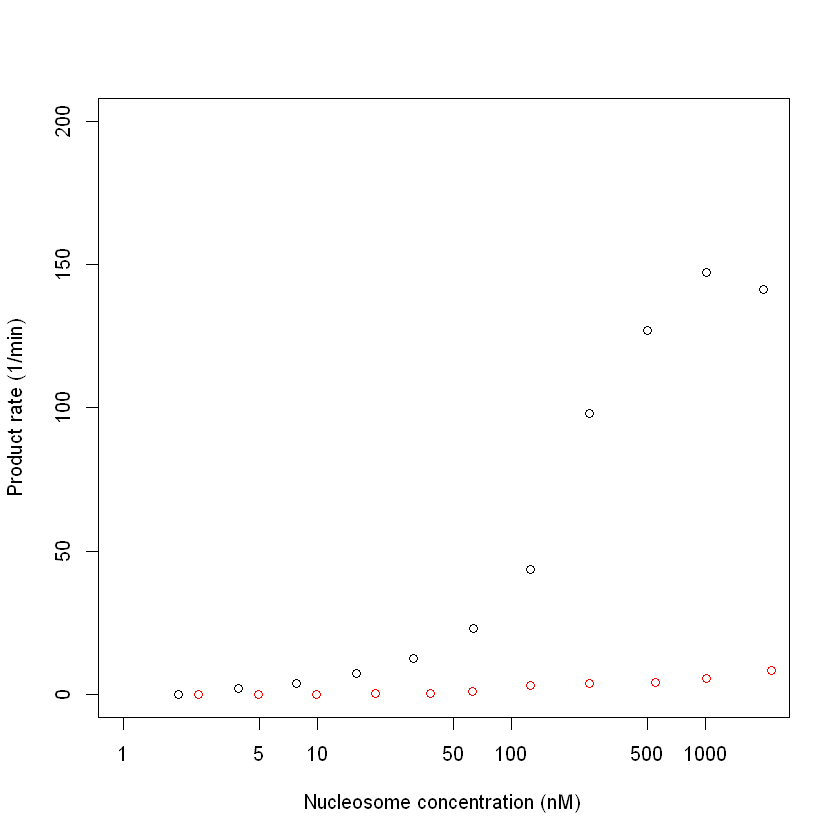

In [35]:
dot1dset<-read.csv("KJA_dataq.csv") #Imports the data from the paper from the csv file.
prod_data=dot1dset[,5:8] #Chooses the part of the dataset we will use
plot(prod_data[,1],prod_data[,2],log="x", xlim=c(1,2000), ylim=c(0,200), xlab="Nucleosome concentration (nM)", ylab="Product rate (1/min)")#Plots the reaction rate for acetylated nucleosomes
points(prod_data[,3],prod_data[,4], col="red")#Plots the reaction rate for unmodified nucleosomes

As always, in order to try to model this experiment, we need to specify the assumptions. <br>
**Assumptions:** The concentration of the substrate (in this case unmodified nucleosomes) is maintained constant and we are measuring the reaction rate at steady state. Of course, we are also using the assumptions underlying the Michaelis-Menten reaction scheme (which were outlined in the previous session). <br>

**Equations:** When the substrate is maintained at a given concentration the equations above become:
\begin{align}
\frac{d c_E}{d t}&= -k_\textrm{on} c_E c_S + k_\textrm{off} c_{ES} + k_\textrm{cat}c_{ES} \\
\frac{d c_{ES}}{d t}&= k_\textrm{on} c_E c_S - k_\textrm{off} c_{ES} - k_\textrm{cat} c_{ES}\\
\frac{d c_P}{d t}&=  k_\textrm{cat} c_{ES}.
\end{align}
Note that $c_S$ is not a variable anymore but a parameter, since the concentration of the substrate has been fixed, which is why the  equation for $c_S$ is no longer necessary. The outcome we are looking for here is $k_\textrm{cat} c_{ES}$ when the reaction has been equilibrated, which corresponds to the catalytic reaction rate at steady state.

**Solving the model:** How can we use the model to compare with the data? One option is to solve the mathematical model for different $c_S$ (nucleosome concentration) and use the value of the product creation rate $k_\textrm{cat} c_{ES}$ towards the end of the simulation. By then, if we have allowed enough simulation time, the reaction should be at steady state. If we do this for various $c_S$ then we should be able to compare with the data of Valencia-Sanchez et al. A script that can be used for this purposes is provided in the cell below.

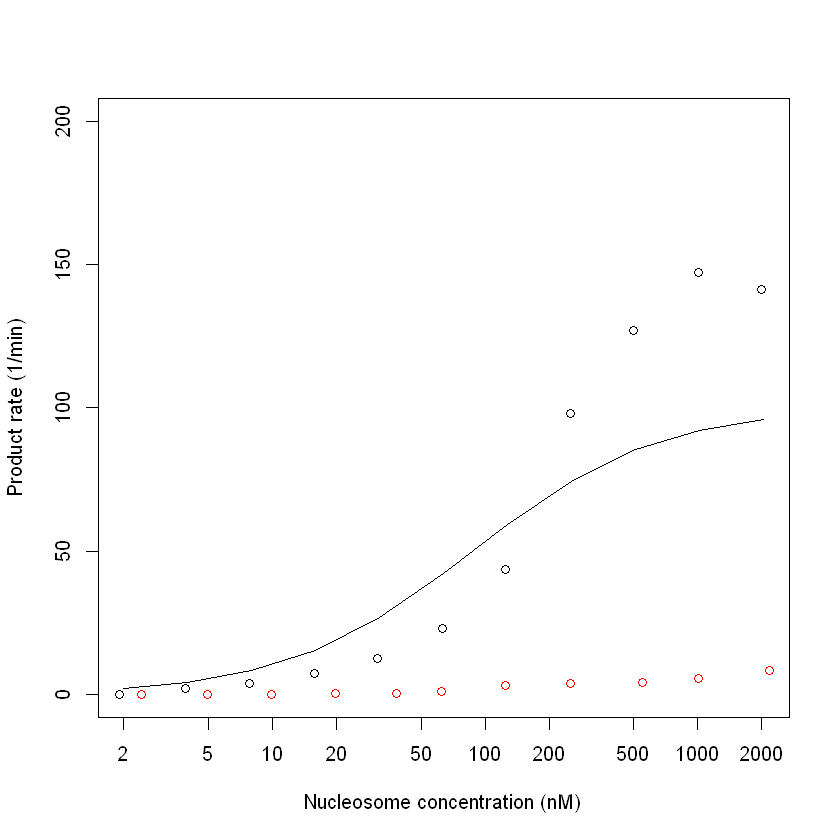

In [36]:
concs=c() #We start a vector where we write down the values of the substrate concentration we will simulate for (c_s).
rates=c() #We start a vector where we write down the values of the reaction rate (k_cat c_es).
times=seq(0,100,1) #Creates a vector of timepoints (minutes) at which the solution will be evaluated
y0=c(20,0) #Initial condition. We assume at t=0 all enzymes are unbound (free).
MMfunc<-function(t,y,a){list(c(-a[1]*a[4]*y[1]+a[2]*y[2]+a[3]*y[2],a[1]*a[4]*y[1]-a[2]*y[2]-a[3]*y[2]))}
#The function in the above line encodes for the first and second equation above, where y[1:2] are the concentrations of the bound and unbound enzymes and a[1:3] the parameters of the reactions
# Note that we do not need to solve the third equation because we are interested in the reaction rate (k_cat c_es) and nor in the evolution of the concentration of product.
for (conc in 1:11) #We simulate 11 times, for different substrate concentration.
    {
    a<-c(0.08,2,5,2^conc) # Parameters for the simulation: k_on, k_off, k_cat, and substrate concentration, c_s.
    sol=ode(y0,times,MMfunc,a) #Calls the R function ‘ode’ to solve the ODE model with parameter given by the vector a.
    concs <- append(concs, 2^conc) #We note down the concentration we simulate for into the vector.
    rates <- append(rates, a[3]*tail(sol,1)[3]) #We note down the reaction rate at the end of the simulation. By this point in time the reaction should have stabilised.
     }
plot(concs,rates, type="l", log="x", ylim=c(0,200), xlab="Nucleosome concentration (nM)", ylab="Product rate (1/min)") #Plots the reaction rates at steady state as a function of the substrate concentration, obtained from the solutions to the equations.
points(prod_data[,3],prod_data[,4], col="red")#Plots the reaction rate for unmodified nucleosomes
points(prod_data[,1],prod_data[,2],col="black")#Plots the reaction rate for acetylated nucleosomes

Now, change the parameters to fit acetylated nucleosomes and note it down. Proceed in the same way for unmodified nucleosomes. <br>

**Question:** *What can we conclude from the data and the model? Which is the key parameter that changes the most between the acetylated and the unmodified nucleosomes as substrates? Is it a parameter related to the enzyme substrate binding ($k_\textrm{on},k_\textrm{off}$) or the catalytic one ($k_\textrm{cat}$)?*

**Bonus Question: Would you be able to do a similar analysis with pen and paper?** You can try setting the derivatives to zero and solve the equations. Then it becomes an algebraic equation which is easier to solve, and, given that we have set the derivatives to zero, it implies we are at steady state (where nothing changes with time). Give an expression for $k_\textrm{cat} c_{ES}$ taking into account that the total number of enzymes ($c_E+c_{ES}=c_\textrm{tot}$) is fixed.